<a href="https://colab.research.google.com/github/msiplab/EicEngLabIV/blob/develop/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 線形回帰モデル

新潟大学工学部工学科　電子情報通信プログラム 

## 準備

In [1]:
!pip install japanize-matplotlib

import warnings
warnings.simplefilter('ignore') #警告を無視（コメントアウト推奨）

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib #日本語化matplotlib
sns.set(font="IPAexGothic") #日本語フォント設定


## 電源モデル

電源電圧$E$，内部抵抗$r$の出力電圧$V$と出力電流$I$の関係は

$V=E-rI$

と表現される。


In [0]:
def load_voltage(current):
  """
  電源モデル
  出力電流と負荷電圧の関係
  """
  # 電源電圧
  source_voltage = 24 # [V]
  # 内部抵抗
  internal_register = 2 # [Ω]
  # 負荷電圧
  return source_voltage - internal_register * current

## 観測データ（ノイズなし）

In [3]:
# 出力電流
current_observations = np.random.rand(2)
# 負荷電圧
load_voltages = load_voltage(current_observations)

#観測データの表
dataset = pd.DataFrame([current_observations,load_voltages],
                       columns = list(range(1,len(current_observations)+1)),
                       index=['I [A]','V [V]'])
display(dataset)

,1,2
I [A],0.566547,0.117898
V [V],22.866907,23.764203


## 散布図の表示


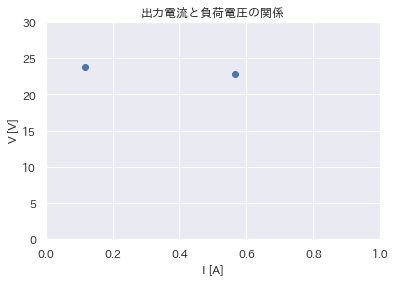

In [4]:
#散布図の表示
plt.scatter(current_observations,load_voltages)
plt.title("出力電流と負荷電圧の関係")
plt.xlabel("I [A]")
plt.ylabel("V [V]")
plt.xlim([0,1])
plt.ylim([0,30])
plt.grid(True)

## 電源電圧 $E$ と内部抵抗 $r$ の解

データセット$\{(\mathrm{I}_1,\mathrm{V}_1),(\mathrm{I}_2,\mathrm{V}_2)\}$より，

$\left(\begin{array}{l}E \\ r\end{array}\right)=\left(\begin{array}{ll}1 & -\mathrm{I}_{1} \\ 1 & -\mathrm{I}_{2}\end{array}\right)^{-1}\left(\begin{array}{l}\mathrm{V}_{1} \\ \mathrm{V}_{2}\end{array}\right)$

In [5]:
X = np.array([[1., -current_observations[0]],
              [1., -current_observations[1]]])
y = load_voltages
beta = np.linalg.solve(X, y)

print("電源電圧 E = {0:5.2f} [V]".format(beta[0]))
print("内部抵抗 r = {0:5.2f} [Ω]".format(beta[1]))

電源電圧 E = 24.00 [V]
内部抵抗 r =  2.00 [Ω]
